In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

dataframe = pd.read_csv("TSLA.csv")
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,1.789333,1.800000,1.726667,1.774667,1.774667,19245000
1,2011-01-04,1.777333,1.796667,1.734667,1.778000,1.778000,17811000
2,2011-01-05,1.765333,1.793333,1.746000,1.788667,1.788667,21700500
3,2011-01-06,1.788667,1.866667,1.787333,1.858667,1.858667,30918000
4,2011-01-07,1.866667,1.905333,1.860000,1.882667,1.882667,33718500


In [149]:
dataframe.shape

(3270, 7)

In [150]:
dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3.270000e+03
mean,73.234467,74.848889,71.495915,73.214106,73.214106,9.971839e+07
std,102.605700,104.895721,100.085427,102.525614,102.525614,7.987937e+07
min,1.452000,1.484667,1.407333,1.455333,1.455333,3.594000e+06
25%,12.555000,12.800000,12.275333,12.573500,12.573500,5.019982e+07
50%,17.390000,17.634334,17.051666,17.389334,17.389334,8.388000e+07
75%,134.857498,136.667496,127.264999,134.085831,134.085831,1.257245e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [151]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3270 non-null   object 
 1   Open       3270 non-null   float64
 2   High       3270 non-null   float64
 3   Low        3270 non-null   float64
 4   Close      3270 non-null   float64
 5   Adj Close  3270 non-null   float64
 6   Volume     3270 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.0+ KB


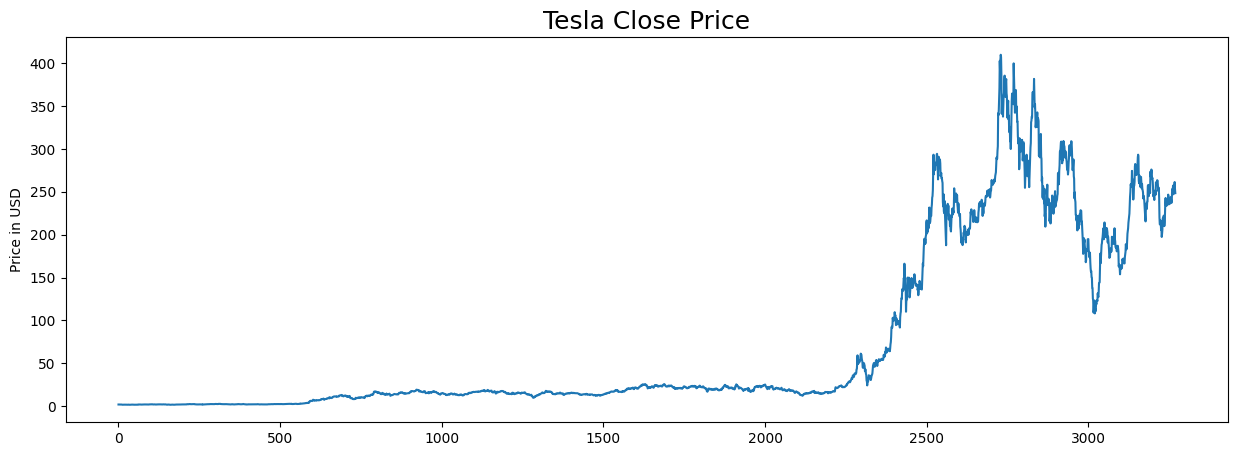

In [152]:
plt.figure(figsize=(15,5))
plt.plot(dataframe['Close'])
plt.title('Tesla Close Price', fontsize=18)
plt.ylabel('Price in USD')
plt.show()

In [153]:
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,1.789333,1.800000,1.726667,1.774667,1.774667,19245000
1,2011-01-04,1.777333,1.796667,1.734667,1.778000,1.778000,17811000
2,2011-01-05,1.765333,1.793333,1.746000,1.788667,1.788667,21700500
3,2011-01-06,1.788667,1.866667,1.787333,1.858667,1.858667,30918000
4,2011-01-07,1.866667,1.905333,1.860000,1.882667,1.882667,33718500


In [154]:
dataframe[dataframe['Close'] == dataframe['Adj Close']].shape

(3270, 7)

In [155]:
dataframe = dataframe.drop(['Adj Close'], axis=1)

In [156]:
dataframe.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

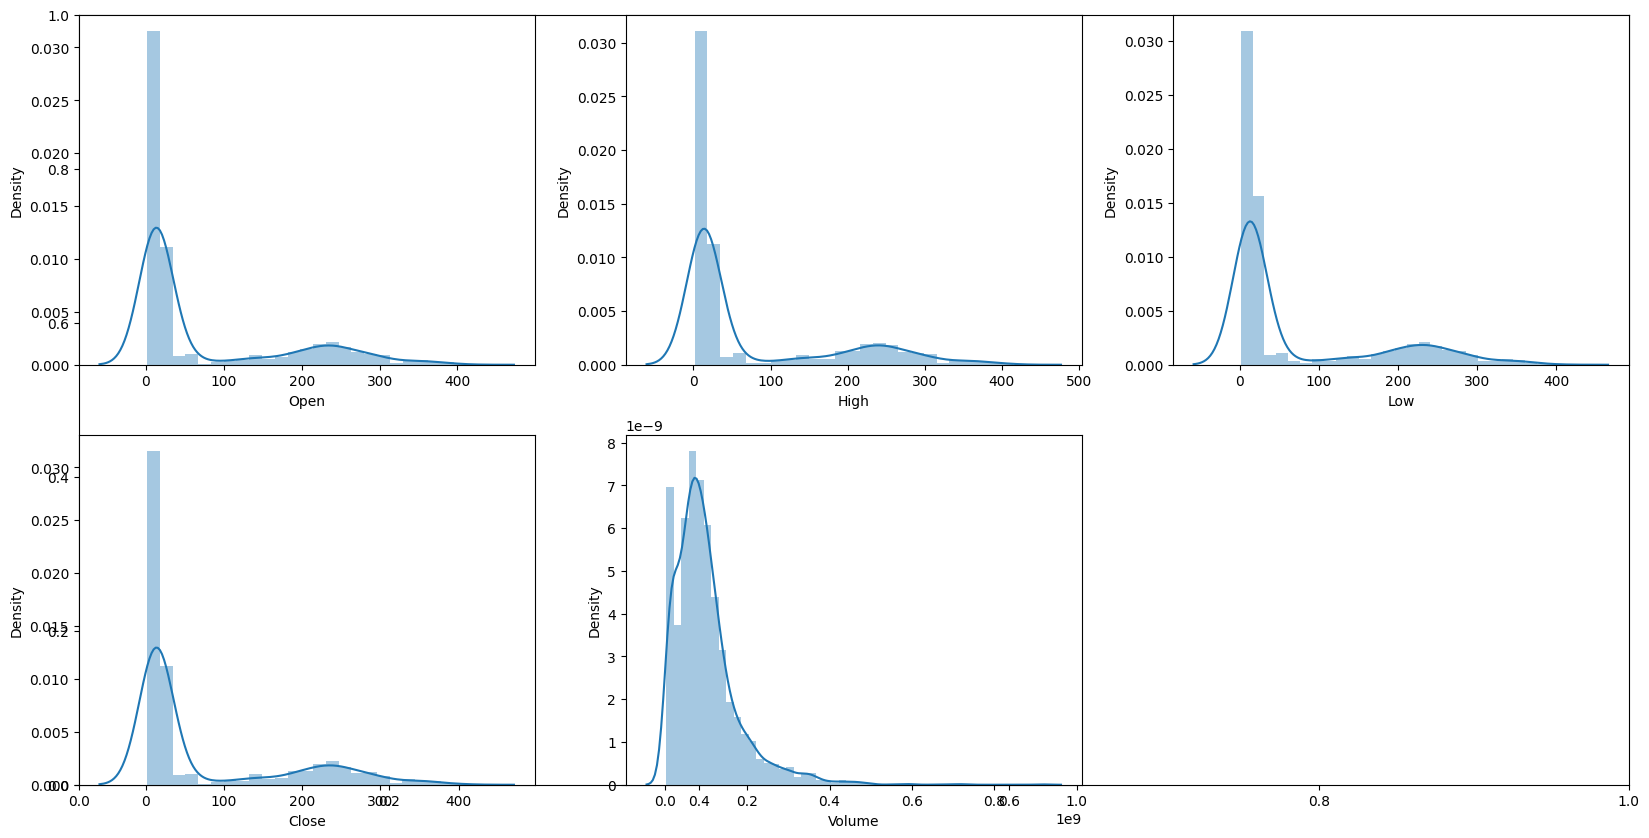

In [157]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.distplot(dataframe[col])

plt.show()

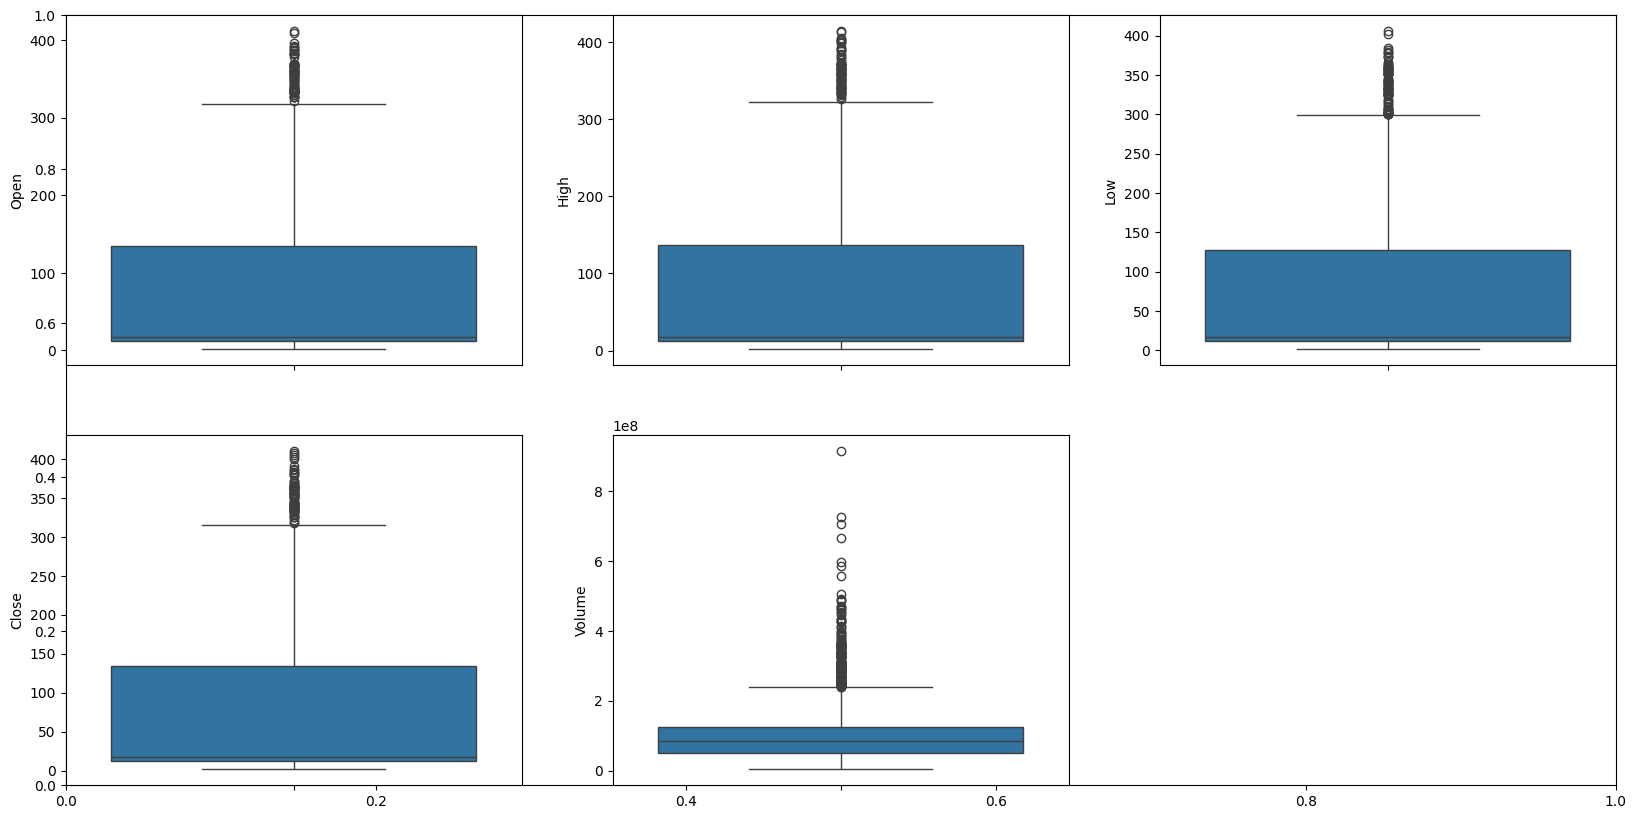

In [158]:
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.boxplot(dataframe[col])

plt.show()

In [159]:
splitted = dataframe['Date'].str.split('-', expand=True)
dataframe['day'] = splitted[2].astype('int')
dataframe['month'] = splitted[1].astype('int')
dataframe['year'] = splitted[0].astype('int')
dataframe.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2011-01-03,1.789333,1.800000,1.726667,1.774667,19245000,3,1,2011
1,2011-01-04,1.777333,1.796667,1.734667,1.778000,17811000,4,1,2011
2,2011-01-05,1.765333,1.793333,1.746000,1.788667,21700500,5,1,2011
3,2011-01-06,1.788667,1.866667,1.787333,1.858667,30918000,6,1,2011
4,2011-01-07,1.866667,1.905333,1.860000,1.882667,33718500,7,1,2011


In [160]:
dataframe['is_quarter_end'] = np.where(dataframe['month'] % 3 == 0, 1, 0)
dataframe.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2011-01-03,1.789333,1.800000,1.726667,1.774667,19245000,3,1,2011,0
1,2011-01-04,1.777333,1.796667,1.734667,1.778000,17811000,4,1,2011,0
2,2011-01-05,1.765333,1.793333,1.746000,1.788667,21700500,5,1,2011,0
3,2011-01-06,1.788667,1.866667,1.787333,1.858667,30918000,6,1,2011,0
4,2011-01-07,1.866667,1.905333,1.860000,1.882667,33718500,7,1,2011,0


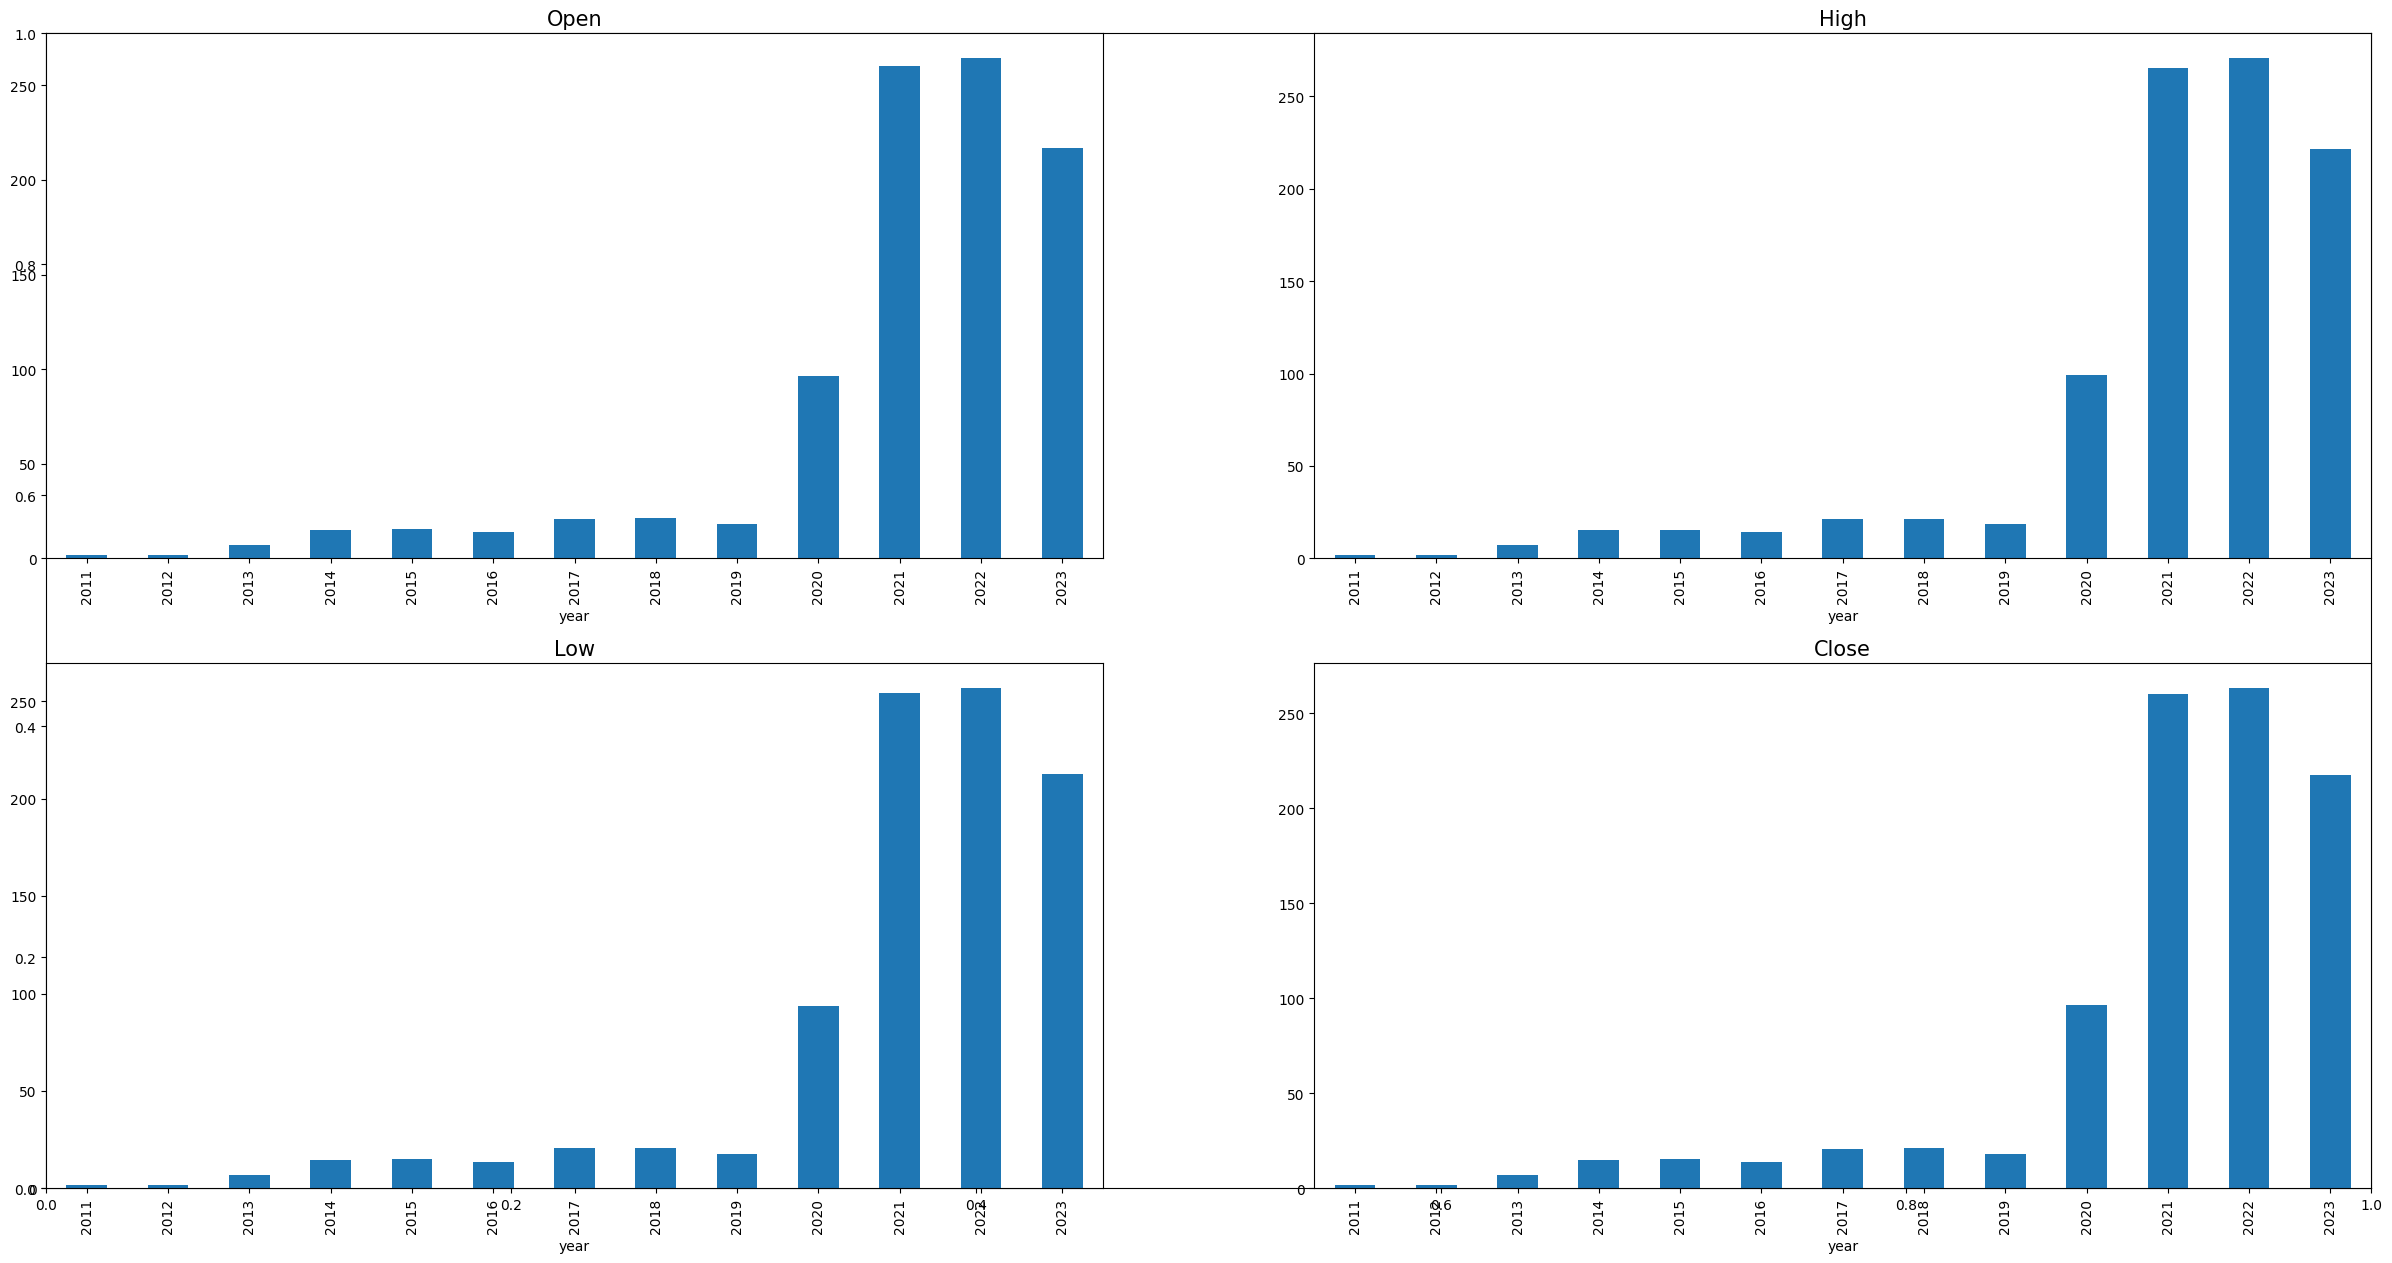

In [161]:
numeric_columns = dataframe.select_dtypes(include=[np.number])
data_grouped = numeric_columns.groupby('year').mean()
plt.subplots(figsize=(30, 15))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    data_grouped[col].plot.bar()
    plt.title(col, fontsize=15)
plt.show()

In [162]:
quarter_end = dataframe.select_dtypes(include=[np.number])
data_grouped = quarter_end.groupby('is_quarter_end').mean()
dataframe

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2011-01-03,1.789333,1.800000,1.726667,1.774667,19245000,3,1,2011,0
1,2011-01-04,1.777333,1.796667,1.734667,1.778000,17811000,4,1,2011,0
2,2011-01-05,1.765333,1.793333,1.746000,1.788667,21700500,5,1,2011,0
3,2011-01-06,1.788667,1.866667,1.787333,1.858667,30918000,6,1,2011,0
4,2011-01-07,1.866667,1.905333,1.860000,1.882667,33718500,7,1,2011,0
...,...,...,...,...,...,...,...,...,...,...
3265,2023-12-22,256.760010,258.220001,251.369995,252.539993,93249800,22,12,2023,1
3266,2023-12-26,254.490005,257.970001,252.910004,256.609985,86892400,26,12,2023,1
3267,2023-12-27,258.350006,263.339996,257.519989,261.440002,106494400,27,12,2023,1
3268,2023-12-28,263.660004,265.130005,252.710007,253.179993,113619900,28,12,2023,1


([<matplotlib.patches.Wedge at 0x1768f0920>,
 [Text(-0.06442810515018392, 1.0981115695897012, '0'),
  Text(0.06442800233755866, -1.0981115756218909, '1')],
 [Text(-0.03514260280919123, 0.5989699470489278, '51.9%'),
  Text(0.035142546729577444, -0.5989699503392132, '48.1%')])

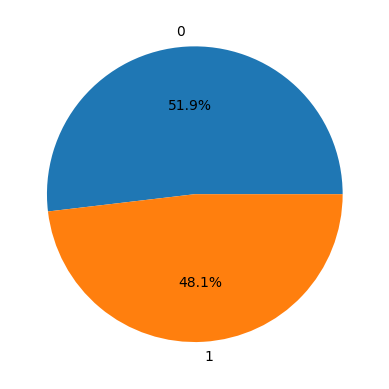

In [163]:
dataframe['open-close'] = dataframe['Open'] - dataframe['Close']
dataframe['low-high'] = dataframe['Low'] - dataframe['High']
dataframe['target'] = np.where(dataframe['Close'].shift(-1) > dataframe['Close'], 1, 0)

plt.pie(dataframe['target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')

In [164]:
dataframe

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2011-01-03,1.789333,1.800000,1.726667,1.774667,19245000,3,1,2011,0,0.014666,-0.073333,1
1,2011-01-04,1.777333,1.796667,1.734667,1.778000,17811000,4,1,2011,0,-0.000667,-0.062000,1
2,2011-01-05,1.765333,1.793333,1.746000,1.788667,21700500,5,1,2011,0,-0.023334,-0.047333,1
3,2011-01-06,1.788667,1.866667,1.787333,1.858667,30918000,6,1,2011,0,-0.070000,-0.079334,1
4,2011-01-07,1.866667,1.905333,1.860000,1.882667,33718500,7,1,2011,0,-0.016000,-0.045333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2023-12-22,256.760010,258.220001,251.369995,252.539993,93249800,22,12,2023,1,4.220017,-6.850006,1
3266,2023-12-26,254.490005,257.970001,252.910004,256.609985,86892400,26,12,2023,1,-2.119980,-5.059997,1
3267,2023-12-27,258.350006,263.339996,257.519989,261.440002,106494400,27,12,2023,1,-3.089996,-5.820007,0
3268,2023-12-28,263.660004,265.130005,252.710007,253.179993,113619900,28,12,2023,1,10.480011,-12.419998,0


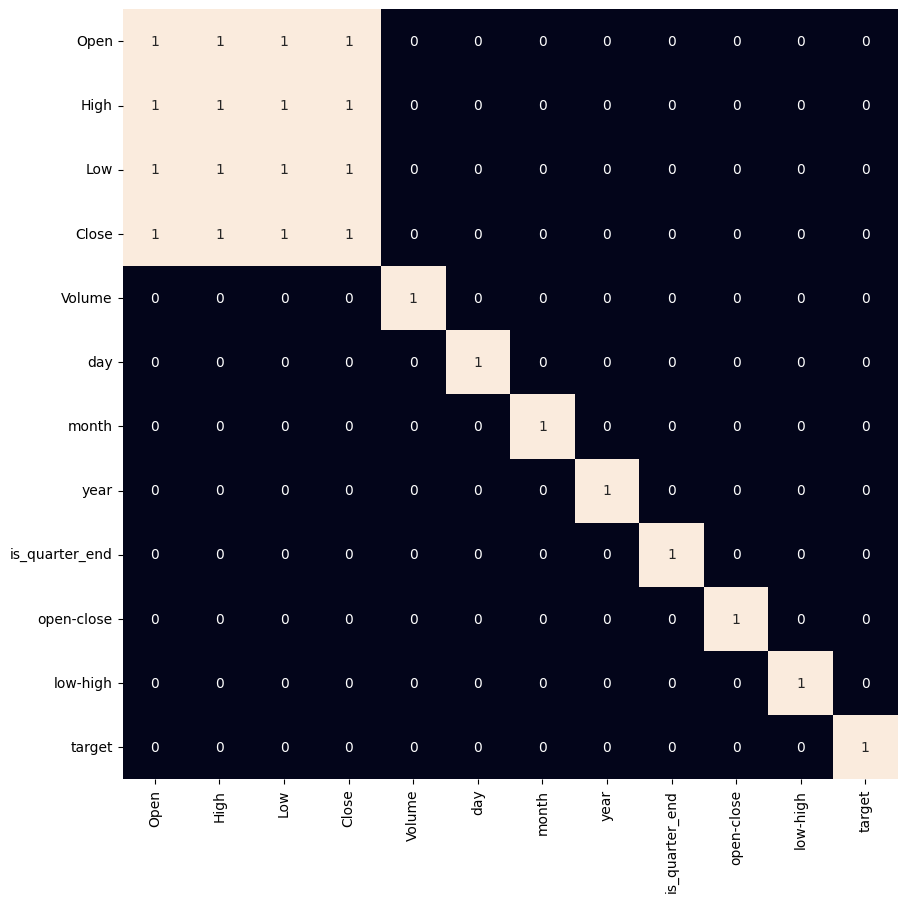

In [165]:
plt.figure(figsize=(10, 10))
range_except_date = dataframe.loc[:, dataframe.columns != 'Date']
sb.heatmap(range_except_date.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [166]:
features = dataframe[['open-close', 'low-high', 'is_quarter_end']]
target = dataframe['target']
scaler = StandardScaler()
features = scaler.fit_transform(features)
x_train, x_valid, y_train, y_valid = train_test_split(features, target, test_size = 0.1, random_state = 2022)
x_train.shape, x_valid.shape

((2943, 3), (327, 3))

In [167]:
models = [LogisticRegression(), SVC(kernel = 'poly', probability = True), XGBClassifier()]
for i in range(3):
    models[i].fit(x_train, y_train)
    print(f'{models[i]} : ')
    print('Training Accuracy: ', metrics.roc_auc_score(y_train, models[i].predict_proba(x_train)[:, 1]))
    print('Validation Accuracy: ', metrics.roc_auc_score(y_valid, models[i].predict_proba(x_valid)[:, 1]))
    print()

LogisticRegression() : 
Training Accuracy:  0.5124788507758796
Validation Accuracy:  0.5037206418107123

SVC(kernel='poly', probability=True) : 
Training Accuracy:  0.4962862378267793
Validation Accuracy:  0.5466242926904892

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accu

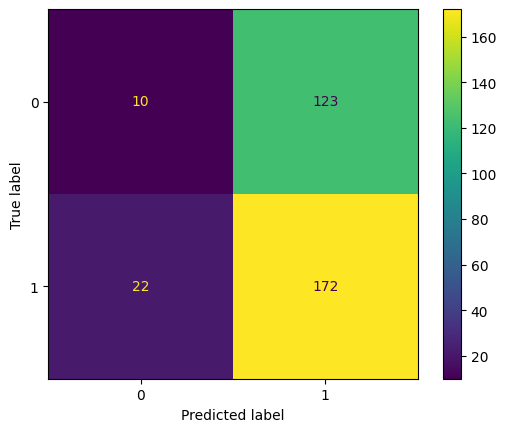

In [168]:
# metrics.plot_confusion_matrix(models[0], x_valid, y_valid)
# plt.show()

clf = SVC(random_state=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_valid)
cm = confusion_matrix(y_valid, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [169]:
# Based on the confusion matrix above we can see that the:
    # Accuracy = 55.67%
    # Precision = 7.52%